In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in photometric prior mode

In [3]:
magnitude_columns = [
                    ('nnmag_grz', '../1_csc-desi-photo-prior/model/nnmag_grz.csv'),
                    ('nnmag_grzw1w2', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2.csv'),
                    ('nnmag_grzw1w2w3w4', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2w3w4.csv'),
                    #('mag_g', 'auto'),
                    #('mag_r', 'auto'),
                    #('mag_z', 'auto'),
                    #('mag_w1', 'auto'),
                    #('mag_w2', 'auto'),
                    #('col_gr', 'auto'),
                    #('col_rz', 'auto'),
                    #('col_zw1', 'auto'),
                    #('col_rw2', 'auto')
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.843224,1.969860e-12,NaN
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,4.574190,1.817511e-12,NaN
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,0.816664,1.505411e-12,NaN
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,0.797151,1.001123e-12,NaN
...,...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,4.828206,1.637604e-15,NaN
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,3.936292,1.608667e-15,NaN
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,3.697835,1.595806e-15,NaN
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,4.029289,1.532857e-15,NaN


    adding angular separation columns
matching: 152204 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:02<00:00, 3338.46it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grz"


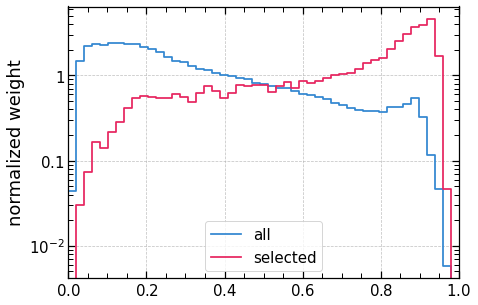

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


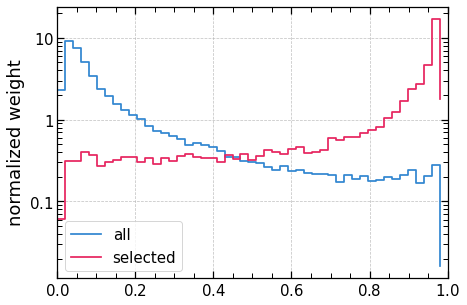

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2w3w4"


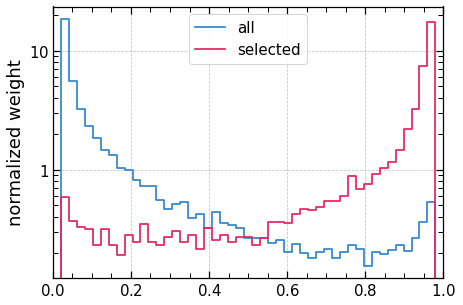


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [4]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


    adding angular separation columns
matching: 112369 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:04<00:00, 1695.92it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grz"


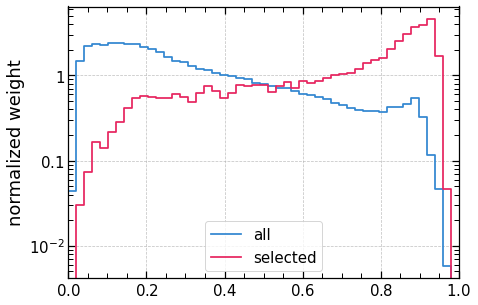

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


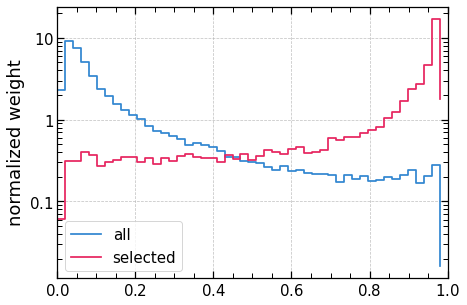

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2w3w4"


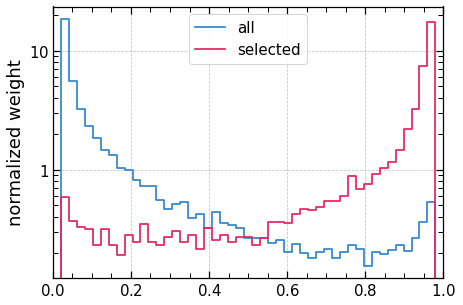


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [5]:

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
**nway_args
)


For a false detection rate of <5%
--> use only counterparts with p_any>0.71 (67.42% of matches)
The efficiency is 82.61%
The purity is  82.89%


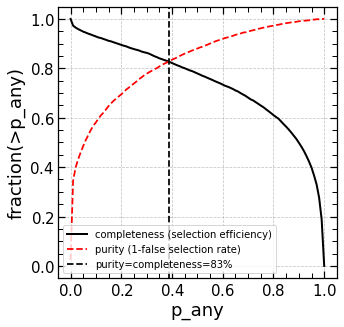

In [6]:
cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)
#plt.figure(figsize=(10,10))
#nway_res_ero.prob_has_match.hist(bins=100, alpha = 0.4)
#nway_res_ero_random.prob_has_match.hist(bins=100, alpha = 0.4)

## Asses the performance of the NWAY with validation catalog (CSC & XMM)

In [7]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway.pkl')

In [23]:
desi_pandas


,DESI,desi_id,ra,dec,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,col_gr,col_rz,col_gz,col_zw1,col_rw2,col_w1w2,col_zw3,col_rw4,col_w3w4,prior_type,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz,mag_g_orig,mag_r_orig,mag_z_orig,mag_w1_orig,mag_w2_orig,mag_w3_orig,mag_w4_orig,col_gr_orig,col_rz_orig,col_gz_orig,col_zw1_orig,col_rw2_orig,col_w1w2_orig,col_zw3_orig,col_rw4_orig,col_w3w4_orig
0,0,b'9011_606802_2605',165.460954,56.382573,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2w3w4',0.972857,-99.0,-99.0,2.915254,2.087654,1.722280,5.013193,5.196579,7.574195,8.353606,0.827600,0.365374,1.192974,-3.290913,-3.108925,-0.183386,-5.851915,-6.265952,-0.779411
1,1,b'9011_605177_2992',157.655218,55.980398,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2w3w4',0.972848,-99.0,-99.0,4.877345,4.564330,4.505185,6.241055,6.745312,8.797101,9.748060,0.313015,0.059145,0.372160,-1.735870,-2.180982,-0.504257,-4.291916,-5.183730,-0.950959
2,2,b'9011_608375_2337',158.790917,57.082795,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2w3w4',0.972859,-99.0,-99.0,5.150754,5.013778,5.079414,6.963816,7.265361,9.411846,10.460558,0.136976,-0.065636,0.071340,-1.884402,-2.251583,-0.301545,-4.332432,-5.446780,-1.048712
3,3,b'9011_609165_2169',160.930717,57.198968,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2w3w4',0.971786,-99.0,-99.0,5.623667,5.891215,6.298098,8.569067,9.066921,11.004789,12.082440,-0.267548,-0.406883,-0.674431,-2.270969,-3.175706,-0.497854,-4.706691,-6.191225,-1.077651
4,4,b'9011_615262_2652',162.848613,59.319899,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2w3w4',0.972464,-99.0,-99.0,5.885894,5.040292,4.663559,5.754431,6.882899,8.257881,9.052430,0.845602,0.376733,1.222335,-1.090872,-1.842607,-1.128468,-3.594322,-4.012138,-0.794549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418569,2418569,b'9011_605995_1099',162.677475,56.208173,-99.0,0.353845,0.359436,0.321875,0.340642,0.389981,0.413893,-99.0,-0.019570,-99.0,0.131465,0.046210,-0.065685,-0.106905,-0.210168,-0.083693,b'None',-99.000000,-99.0,-99.0,NaN,12.384571,12.580270,11.265625,11.922470,13.649320,14.486250,NaN,-0.195699,NaN,1.314645,0.462101,-0.656845,-1.069050,-2.101679,-0.836930
2418570,2418570,b'9011_606803_804',165.704475,56.477614,-99.0,0.582400,0.565626,0.568368,0.575331,0.520964,0.467470,-99.0,0.058709,-99.0,-0.009599,0.024741,-0.024370,0.156316,0.402252,0.187227,b'None',-99.000000,-99.0,-99.0,NaN,20.383986,19.796894,19.892883,20.136581,18.233732,16.361464,NaN,0.587092,NaN,-0.095989,0.247405,-0.243698,1.563162,4.022522,1.872268
2418571,2418571,b'9011_602737_2527',162.350176,55.280935,-99.0,0.330493,0.376413,0.293252,0.305459,0.354567,0.383200,-99.0,-0.160718,-99.0,0.291062,0.087621,-0.042722,0.076460,-0.184473,-0.100215,b'None',-99.000000,-99.0,-99.0,NaN,11.567264,13.174446,10.263829,10.691053,12.409847,13.411996,NaN,-1.607182,NaN,2.910617,0.876211,-0.427224,0.764599,-1.844732,-1.002149
2418572,2418572,b'9011_605989_2125',160.095394,56.140614,-99.0,0.306894,0.339941,0.316861,0.335064,0.382832,0.408375,-99.0,-0.115664,-99.0,0.080781,-0.098595,-0.063712,-0.150119,-0.355182,-0.089399,b'None',-99.000000,-99.0,-99.0,NaN,10.741294,11.897931,11.090126,11.727248,13.399123,14.293112,NaN,-1.156637,NaN,0.807805,-0.985954,-0.637122,-1.501192,-3.551818,-0.893989


NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 95% 
 Purity = 95% 
 prob_has_match optimal cutoff =  0.41 
 Fraction of sources with prob_has_match > 0.41 = 83%
+++Statistics+++
687 X-ray sources in validation set with counterparts
--Out of those, 32 sources were assigned hostless (prob_has_match < 0.41) 
655 sources have prob_has_match > 0.41
Out of those 655: 
--625 sources have correct nway counterpart
--30 sources have incorrect nway counterpart


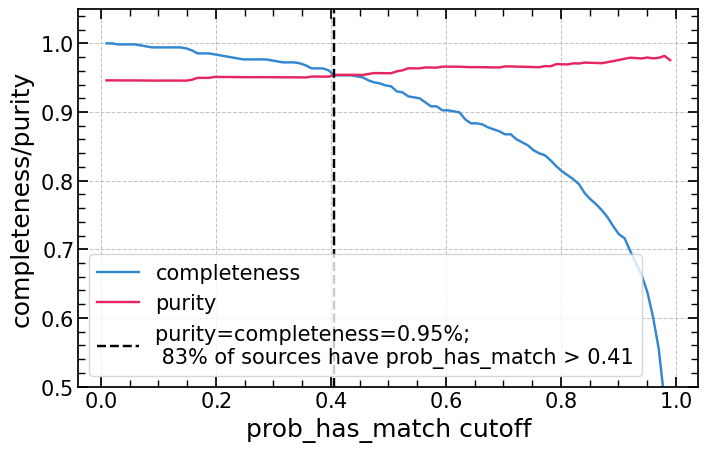

In [21]:
validation_df, p_any_cutoff = assess_goodnes_nway_cross_match(nway_res_ero)

NWAY results for Source 1516:

This source probably has a counterpart (p_any=1.00)

Assuming it has a counterpart, we have the following possible associations:

Disclaimer: These results assume that the input (sky densities, positional errors, and priors) are correct.



,EROSITA,DESI,Separation_EROSITA_DESI,match_flag,prob_has_match,prob_this_match,ID,pos_err,desi_id_true_ctp,desi_id,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
26241,1516,95913,1.005961,1,0.995555,9.764874e-01,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_859',0.943712,-99.000000,-99.000000
26256,1516,2417458,2.221664,0,0.995555,2.351178e-02,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_855',-99.000000,-99.000000,-99.000000
26242,1516,469251,6.848700,0,0.995555,8.499395e-07,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_847',0.060488,-99.000000,-99.000000
26250,1516,1241758,10.313864,0,0.995555,1.857043e-10,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_823',-99.000000,0.326036,-99.000000
26249,1516,1091174,12.610228,0,0.995555,1.003958e-15,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_802',-99.000000,0.045998,-99.000000
26245,1516,703796,19.736497,0,0.995555,1.530026e-32,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_928',-99.000000,-99.000000,0.392033
26252,1516,2028526,20.830768,0,0.995555,4.157496e-37,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_932',-99.000000,0.056305,-99.000000
26248,1516,870390,23.626478,0,0.995555,1.025310e-45,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_950',0.241951,-99.000000,-99.000000
26246,1516,844717,24.637189,0,0.995555,2.148579e-50,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_951',-99.000000,-99.000000,0.089494
26254,1516,2209266,24.596856,0,0.995555,1.719936e-50,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_783',-99.000000,0.040517,-99.000000


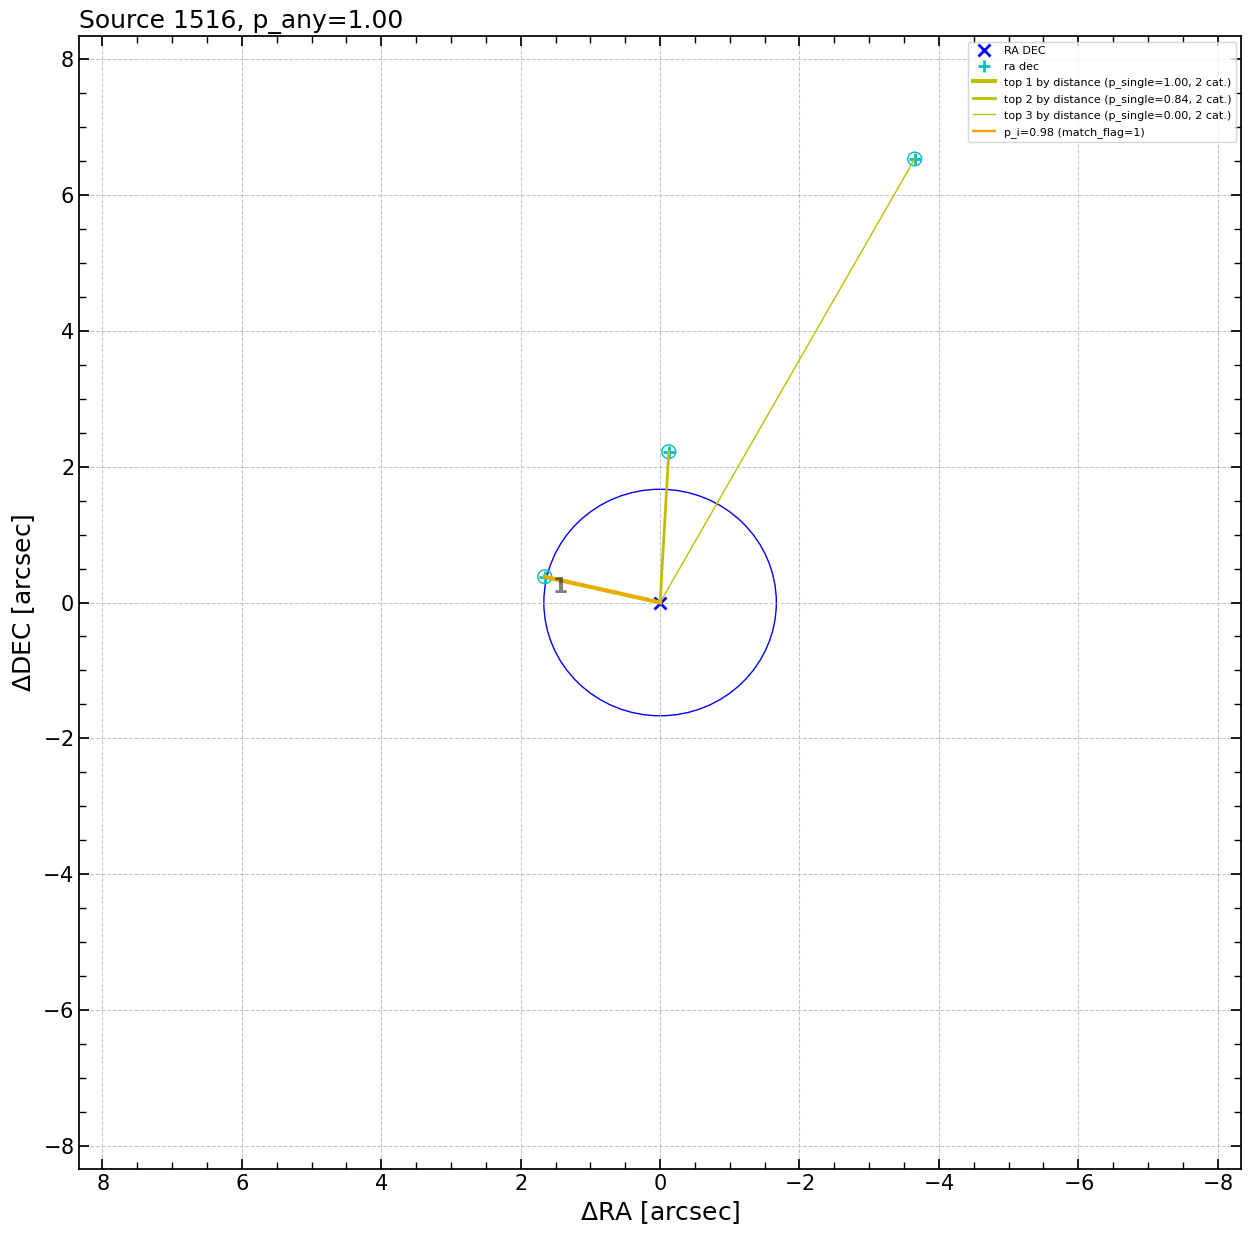

In [56]:

tmp_df = nway.explain(nway_res_ero, id = 1516, primary_id_col = 'EROSITA', cols_ra = ['RA', 'ra'], cols_dec=['DEC', 'dec'], cols_err = ['pos_err', 'desi_pos_err'],
tablenames = ['EROSITA', 'DESI'])
tmp_df[['EROSITA', 'DESI', 'Separation_EROSITA_DESI', 'match_flag',
       'prob_has_match', 'prob_this_match', 'ID', 'pos_err', 'desi_id_true_ctp', 'desi_id', 'nnmag_grzw1w2w3w4',
       'nnmag_grzw1w2', 'nnmag_grz']]